# Import Libraries

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = pd.read_csv('train.csv')

### Pre-processing Data

In [ ]:
df.head(10)

,tweets,labels
0,sending solidarity whoever doctor manage incre...,Stressed
1,need see hair amp beard gat book appointment b...,Anxious
2,next time meet someone new dont ask ask love,Normal
3,surprise someone love give la senza gift box r...,Lonely
4,raise hand junhoes ocean lotion life rent free...,Normal
5,mariposa de barrio teach matter guy forever ch...,Normal
6,good point remember 1013 leave alone pokie clu...,Anxious
7,mori wip white dress,Normal
8,okay ik lot people go want im make gc ashnikko...,Anxious
9,im gonna say,Normal


In [ ]:
def preprocess_text(df,column_name):

    df[column_name] = df[column_name].apply(lambda x: " ".join(x.lower() for x in x.split()))
    df[column_name] = df[column_name].str.replace('[^\w\s]','')
    #remove stop words
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    df[column_name] = df[column_name].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    #spell correct
    #df[column_name].apply(lambda x: str(TextBlob(x).correct()))
    st = PorterStemmer()
    df[column_name][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    #lemmatize
    df[column_name] = df[column_name].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    return df

In [ ]:
preproeessed_df_train = preprocess_text(df,"tweets")
preproeessed_df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29992 entries, 0 to 29991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  29992 non-null  object
 1   labels  29992 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [ ]:
# using  countVectorizer Multinomail Na
X = df['tweets']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

X_test_counts = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_counts)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Anxious       0.36      0.54      0.43      1638
      Lonely       0.31      0.27      0.29      1371
      Normal       0.89      0.52      0.65      1616
    Stressed       0.87      0.89      0.88      1374

    accuracy                           0.55      5999
   macro avg       0.61      0.55      0.56      5999
weighted avg       0.61      0.55      0.56      5999



In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Training the Model
clf = MultinomialNB()  # Initialize Multinomial Naive Bayes classifier
clf.fit(X_train_tfidf, y_train)

# Step 5: Evaluating the Model
y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Anxious       0.36      0.71      0.48      1638
      Lonely       0.24      0.10      0.14      1371
      Normal       0.86      0.48      0.62      1616
    Stressed       0.89      0.81      0.84      1374

    accuracy                           0.53      5999
   macro avg       0.58      0.53      0.52      5999
weighted avg       0.59      0.53      0.52      5999



In [ ]:
# Random Forest Classifier
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Anxious       0.39      0.40      0.39      1638
      Lonely       0.30      0.29      0.29      1371
      Normal       0.92      0.94      0.93      1616
    Stressed       0.98      0.94      0.96      1374

    accuracy                           0.65      5999
   macro avg       0.65      0.64      0.64      5999
weighted avg       0.65      0.65      0.65      5999



In [ ]:
# Tokenizing with NLTK
def tokenization(inputs):
    return word_tokenize(inputs)

df['tweet_tokenized'] = df['tweets'].apply(tokenization)

In [ ]:
df.head(5)

,tweets,labels,tweet_tokenized
0,sending solidarity whoever doctor manage incre...,Stressed,"[sending, solidarity, whoever, doctor, manage,..."
1,need see hair amp beard gat book appointment b...,Anxious,"[need, see, hair, amp, beard, gat, book, appoi..."
2,next time meet someone new dont ask ask love,Normal,"[next, time, meet, someone, new, dont, ask, as..."
3,surprise someone love give la senza gift box r...,Lonely,"[surprise, someone, love, give, la, senza, gif..."
4,raise hand junhoes ocean lotion life rent free...,Normal,"[raise, hand, junhoes, ocean, lotion, life, re..."


In [ ]:
# Stopwords Removal
stop_words = set(stopwords.words('english'))

def stopwords_remove(inputs):
    return [item for item in inputs if item not in stop_words]

df['text_stop'] = df['tweet_tokenized'].apply(stopwords_remove)
df.tail(5)

,tweets,labels,tweet_tokenized,text_stop
29987,originsmp originssmp,Normal,"[originsmp, originssmp]","[originsmp, originssmp]"
29988,name muhammad asif farooqi im pakistan amp sta...,Lonely,"[name, muhammad, asif, farooqi, im, pakistan, ...","[name, muhammad, asif, farooqi, im, pakistan, ..."
29989,moms mad wont go overnight skiing trip 5 peopl...,Stressed,"[moms, mad, wont, go, overnight, skiing, trip,...","[moms, mad, wont, go, overnight, skiing, trip,..."
29990,even tonight youre go bed date someone cannot ...,Normal,"[even, tonight, youre, go, bed, date, someone,...","[even, tonight, youre, go, bed, date, someone,..."
29991,jps gooooo amp suck yuh madda mi haaaaaaaaaaaa...,Lonely,"[jps, gooooo, amp, suck, yuh, madda, mi, haaaa...","[jps, gooooo, amp, suck, yuh, madda, mi, haaaa..."


# Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

# Function to map Part-of-Speech tags to WordNet tags
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize text
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]  # Lemmatize tokens
    return ' '.join(lemmatized_tokens)  # Join lemmatized tokens back into a string

# Apply lemmatization to 'tweets' column
df['tweets_lemmatized'] = df['tweets'].apply(lemmatize_text)


In [ ]:
df.loc[:20,['tweets','tweets_lemmatized']]

## Histogram of the count of text

In [ ]:
fig = px.histogram(df, x='labels', color='labels')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Labels',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

In [ ]:
df['count'] = df['tweets'].apply(lambda x: len(x.split()))
df.head()

,tweets,labels,count
0,sending solidarity whoever doctor manage incre...,Stressed,10
1,need see hair amp beard gat book appointment b...,Anxious,16
2,next time meet someone new dont ask ask love,Normal,9
3,surprise someone love give la senza gift box r...,Lonely,21
4,raise hand junhoes ocean lotion life rent free...,Normal,12


<Figure size 1000x1000 with 0 Axes>

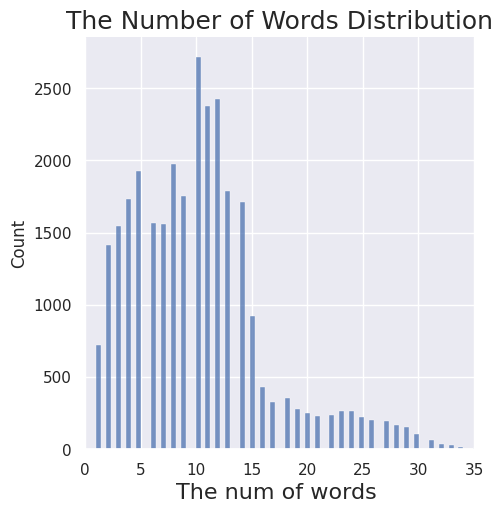

In [ ]:
plt.figure(figsize= (10, 10))

sns.displot(df['count'])

plt.xlim(0, 35)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

In [ ]:
fig = px.histogram(df['count'], marginal='box',
                   labels={"value": "Length of the Text"})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=22))
fig.show()
# The length of the data points is distributed between 4 to 46. The outliers start from 48 words.

In [ ]:
fig = px.histogram(df['count'], marginal='box',
                   labels={"value": "Length of the Tweets"},
                   color=df['labels'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the tweets by Emotions',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

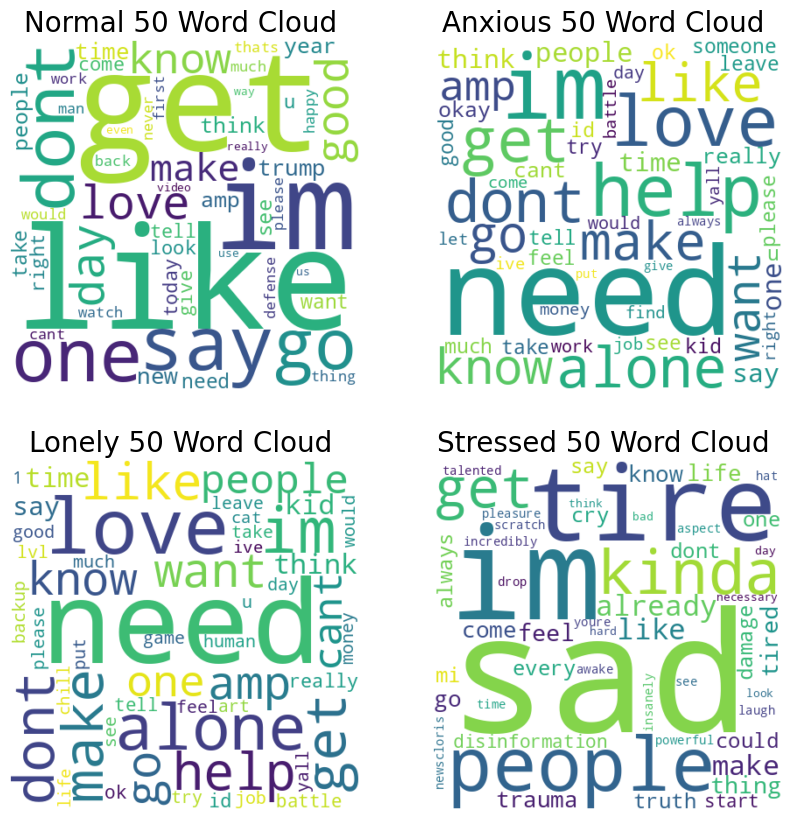

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


def generate_wordcloud(ax, tweets, label):
    if tweets.empty:
        print(f"No tweets found for label: {label}")
    else:
        words = ' '.join(tweets).split()
        word_freq = Counter(words)
        top_words = dict(word_freq.most_common(50))

        wordcloud = WordCloud(width=400, height=400,
                              background_color='white',
                              stopwords=None,
                              min_font_size=10).generate_from_frequencies(top_words)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(label + ' 50 Word Cloud ',fontsize=20)
        ax.axis("off")

# Generate word cloud for each label
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
labels = ['Normal', 'Anxious', 'Lonely', 'Stressed']
for i, label in enumerate(labels):
    tweets_for_label = df[df['labels'] == label]['tweets']
    generate_wordcloud(axes[i//2, i%2], tweets_for_label, label)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()


# Bar Plot for each of the new category

In [ ]:
category_count = df['labels'].value_counts()
categories = category_count.index
categories

Index(['Anxious', 'Normal', 'Stressed', 'Lonely'], dtype='object', name='labels')

In [ ]:
category_count

labels
Anxious     8388
Normal      7976
Stressed    6840
Lonely      6788
Name: count, dtype: int64

<ipython-input-51-6c6f753f5779>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




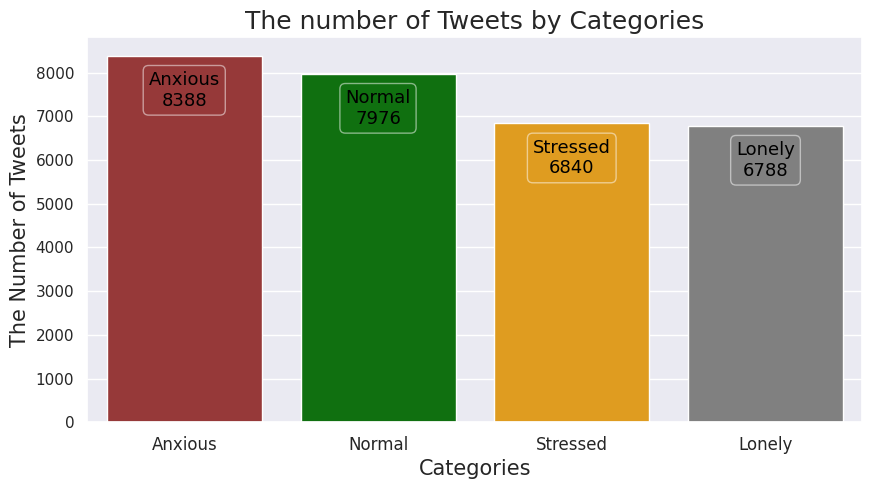

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
other_color = 'gray'

colors = ['brown', 'green', 'orange', 'gray']
colors += [other_color] * (len(category_count) - len(colors))
sns.barplot(x=category_count.index, y=category_count, palette=colors, ax=ax)
for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n{format(p.get_height(), ".0f")}',
                xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                xytext=(0, -25),
                size=13,
                color='black',
                ha='center',
                va='center',
                textcoords='offset points',
                bbox=dict(boxstyle='round', facecolor='none', edgecolor='white', alpha=0.5))

plt.xlabel('Categories', size=15)
plt.ylabel('The Number of Tweets', size=15)
plt.xticks(size=12)
plt.title("The number of Tweets by Categories", size=18)

plt.show()

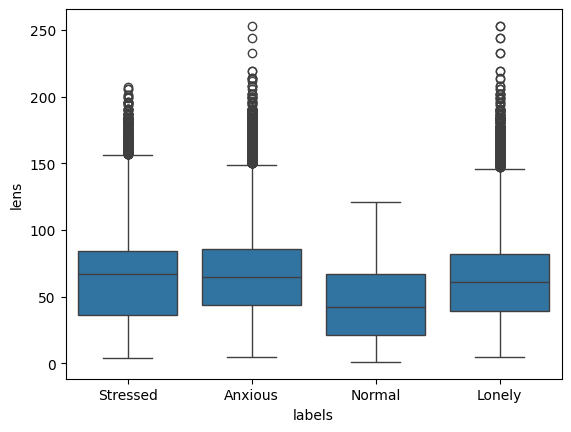

In [ ]:
all_lens = [len(t) for t in df['tweets'].values]
df['lens'] = all_lens

sns.boxplot(data=df, x='labels', y='lens')
plt.show()

,tweets,labels,count,lens
0,sending solidarity whoever doctor manage incre...,3,10,86
1,need see hair amp beard gat book appointment b...,0,16,92
2,next time meet someone new dont ask ask love,2,9,45
3,surprise someone love give la senza gift box r...,1,21,191
4,raise hand junhoes ocean lotion life rent free...,2,12,82
...,...,...,...,...
29987,originsmp originssmp,2,2,21
29988,name muhammad asif farooqi im pakistan amp sta...,1,11,84
29989,moms mad wont go overnight skiing trip 5 peopl...,3,21,119
29990,even tonight youre go bed date someone cannot ...,2,11,62


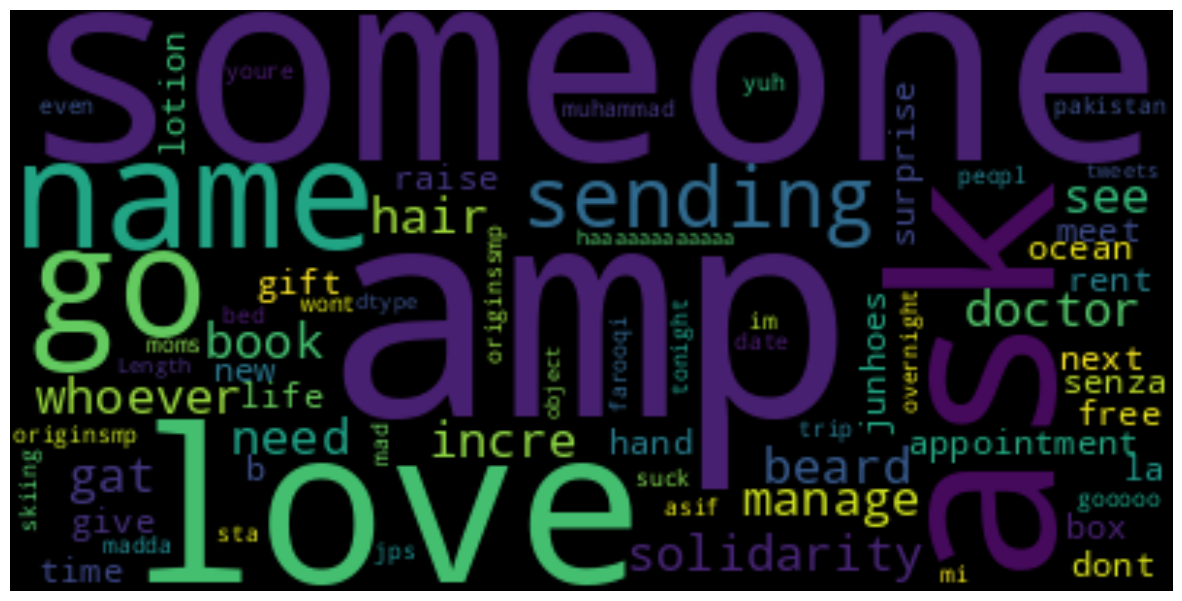

In [ ]:
FreqOfWords = df['tweets'].str.split(expand=True).stack().value_counts()
wordcloud = WordCloud(max_words=100,
                      random_state=42,
                      collocations=True).generate(str((df['tweets'])))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

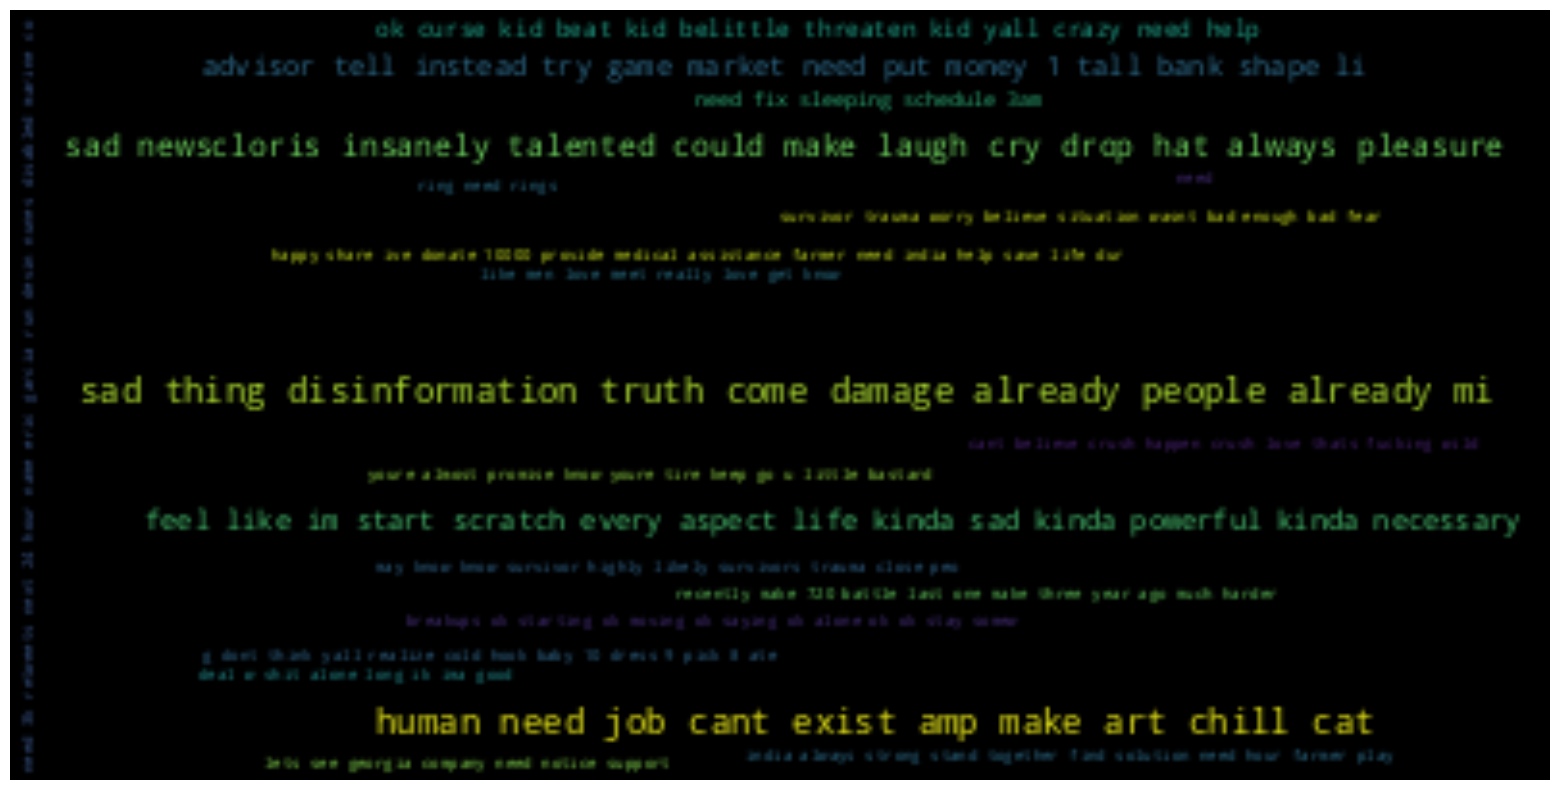

In [ ]:
frequency_dist = nltk.FreqDist(df['tweets'])
ordereddist =sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
sns.set(rc={'figure.figsize':(20,10)})
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Calculate the frequency of words
FreqOfWords = df['tweets'].str.split(expand=True).stack().value_counts()
# print(len(FreqOfWords)) # total words 21857
FreqOfWords_top100 = FreqOfWords.head(50)

fig = px.treemap(FreqOfWords_top100, path=[FreqOfWords_top100.index], values=FreqOfWords_top100)

fig.update_layout(
    title='Frequency of top 100 the Words in the Train Dataset',
    title_x=0.5,
    title_font=dict(size=22)
)
fig.update_traces(textinfo="label+value")
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


# Define a function to calculate word frequency for a specific label
def calculate_word_frequency_for_label(df, label):
    # Filter DataFrame by label
    df_label = df[df['labels'] == label]
    # Calculate word frequency
    FreqOfWords = df_label['tweets'].str.split(expand=True).stack().value_counts()
    FreqOfWords_top50 = FreqOfWords.head(50)  # Considering top 100 words
    return FreqOfWords_top100

# Create frequency distribution graphs for each label
labels = ['Normal', 'Anxious', 'Lonely', 'Stressed']
figs = []
for label in labels:
    freq_top100 = calculate_word_frequency_for_label(df, label)
    fig = px.treemap(freq_top100, path=[freq_top100.index], values=freq_top100,
                     title=f'Frequency of top 50 words in the {label} tweets',
                     labels={"labels": "Words"})
    fig.update_layout(title_x=0.5, title_font=dict(size=22))
    fig.update_traces(textinfo="label+value")
    figs.append(fig)

# Show the graphs
for fig in figs:
    fig.show()


In [1]:

import pandas as pd

In [3]:
df = pd.DataFrame({"Age":[1,2,3,4]})
df

,Age
0,1
1,2
2,3
3,4


In [6]:
df.Age.value_counts(normalize=True).sort_index()

Age
1    0.25
2    0.25
3    0.25
4    0.25
Name: proportion, dtype: float64

In [7]:
df

,Age
0,1
1,2
2,3
3,4
